In [2]:
from src.data.some_dataloader import RedditDataset
import numpy as np
import matplotlib.pyplot as plt

dataset = RedditDataset()
data = dataset.data

   SOURCE_SUBREDDIT TARGET_SUBREDDIT  POST_ID           TIMESTAMP  \
0               007     daniel_craig  47jk2ks 2016-02-21 11:31:51   
1           07scape  osrstranscripts  4awitvs 2016-03-17 19:43:29   
2           07scape  osrstranscripts  4b3xgss 2016-03-19 10:29:35   
3     07thexpansion     visualnovels  28p0qes 2014-05-10 16:08:45   
4  098f6bcd4621d373        askreddit  5so6xps 2017-02-08 15:08:37   

   LINK_SENTIMENT                                         PROPERTIES  
0               1  44.0,40.0,0.840909090909,0.0,0.181818181818,0....  
1               1  5519.0,4803.0,0.720601558253,0.0338829498097,0...  
2               1  8704.0,7531.0,0.712431066176,0.0400965073529,0...  
3               1  123.0,104.0,0.780487804878,0.0,0.0894308943089...  
4               1  25.0,23.0,0.84,0.0,0.24,0.12,0.04,4.0,4.0,1.0,...  


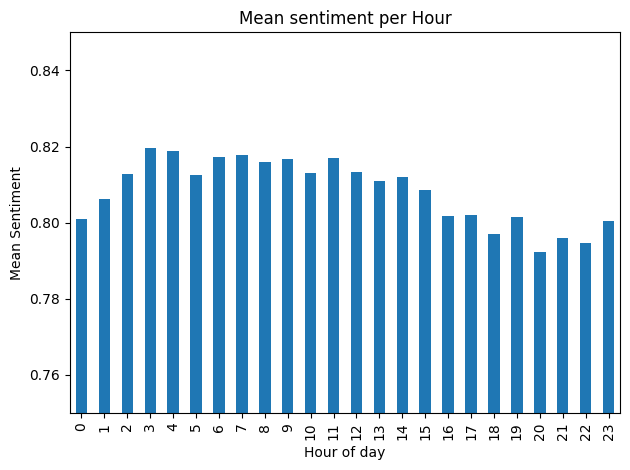

In [6]:
# Sentiment by hour of day

data['hour'] = data['TIMESTAMP'].dt.hour
sentiment_by_hour = data.groupby('hour')['LINK_SENTIMENT'].mean()

sentiment_by_hour.plot(kind='bar')
plt.ylim(0.75, 0.85)
plt.title('Mean sentiment per Hour')
plt.xlabel('Hour of day')
plt.ylabel('Mean Sentiment')
plt.tight_layout()
plt.show()

Using 205 subreddits (>500 posts)


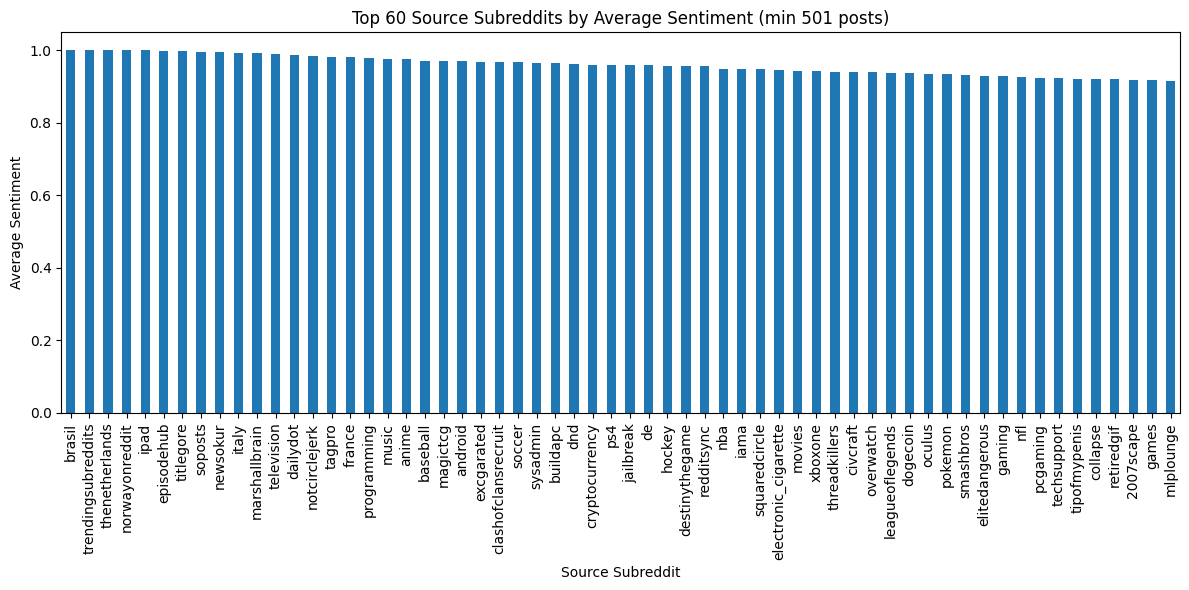

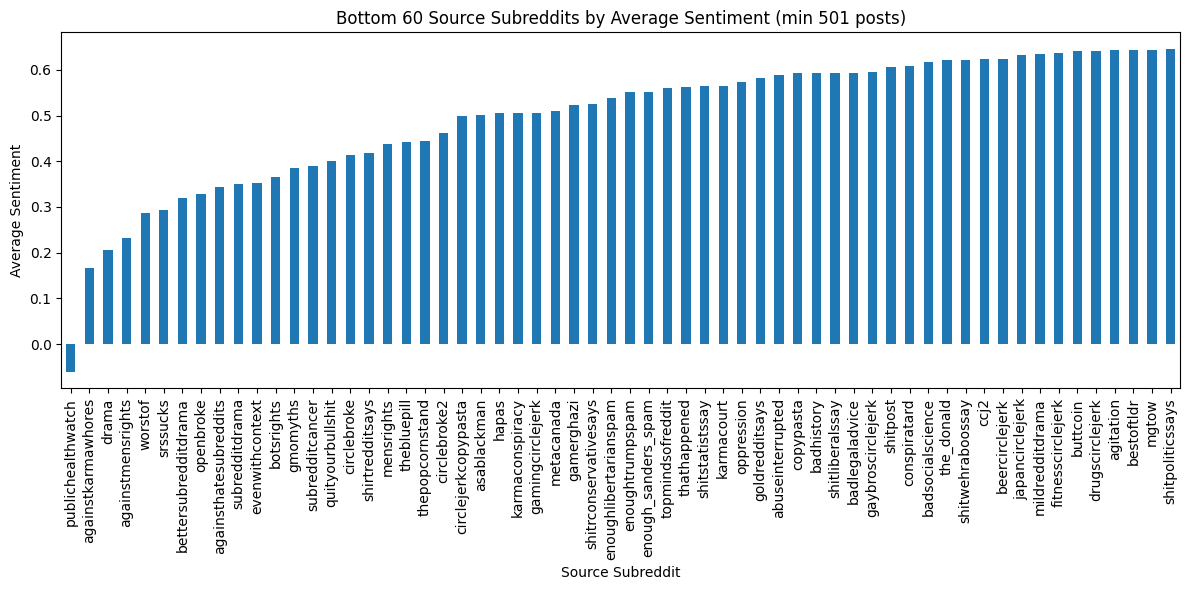

In [18]:
# Rank subreddits by average sentiment

# Only include subreddits with more than 1000 entries
min_count = 500
counts = data['SOURCE_SUBREDDIT'].value_counts()
popular_subs = counts[counts > min_count].index
print(f'Using {len(popular_subs)} subreddits (>{min_count} posts)')

# Compute average sentiment only for popular subreddits
avg_sentiment_by_subreddit = (
    data[data['SOURCE_SUBREDDIT'].isin(popular_subs)]
    .groupby('SOURCE_SUBREDDIT')['LINK_SENTIMENT']
    .mean()
)

# Convert Series to DataFrame and plot the top N subreddits by average sentiment.
avg_df = avg_sentiment_by_subreddit.reset_index().rename(columns={'LINK_SENTIMENT': 'avg_sentiment'})

top_n = 60
top_avg = avg_df.sort_values('avg_sentiment', ascending=False).head(top_n).set_index('SOURCE_SUBREDDIT')

top_avg['avg_sentiment'].plot(kind='bar', figsize=(12,6))
plt.title(f'Top {top_n} Source Subreddits by Average Sentiment (min {min_count+1} posts)')
plt.xlabel('Source Subreddit')
plt.ylabel('Average Sentiment')
plt.tight_layout()
plt.show()

# Show bottom N subreddits by average sentiment
bottom_n = 60
bottom_avg = avg_df.sort_values('avg_sentiment', ascending=True).head(bottom_n).set_index('SOURCE_SUBREDDIT')
bottom_avg['avg_sentiment'].plot(kind='bar', figsize=(12,6))
plt.title(f'Bottom {bottom_n} Source Subreddits by Average Sentiment (min {min_count+1} posts)')
plt.xlabel('Source Subreddit')
plt.ylabel('Average Sentiment')
plt.tight_layout()
plt.show()

Using 2077 subreddits (>50 posts)


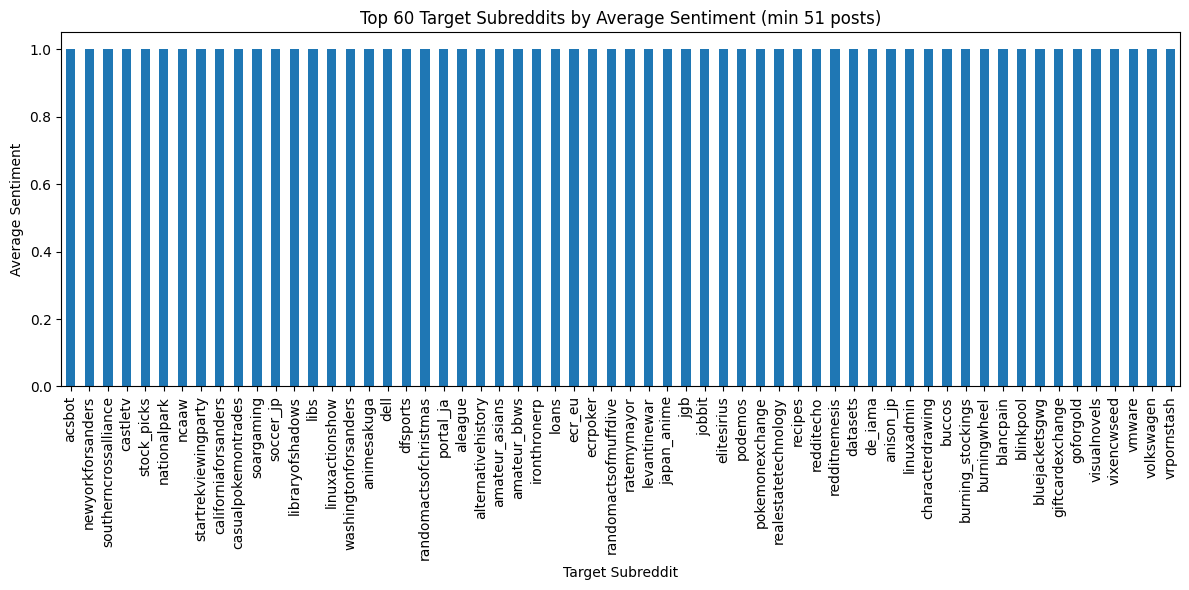

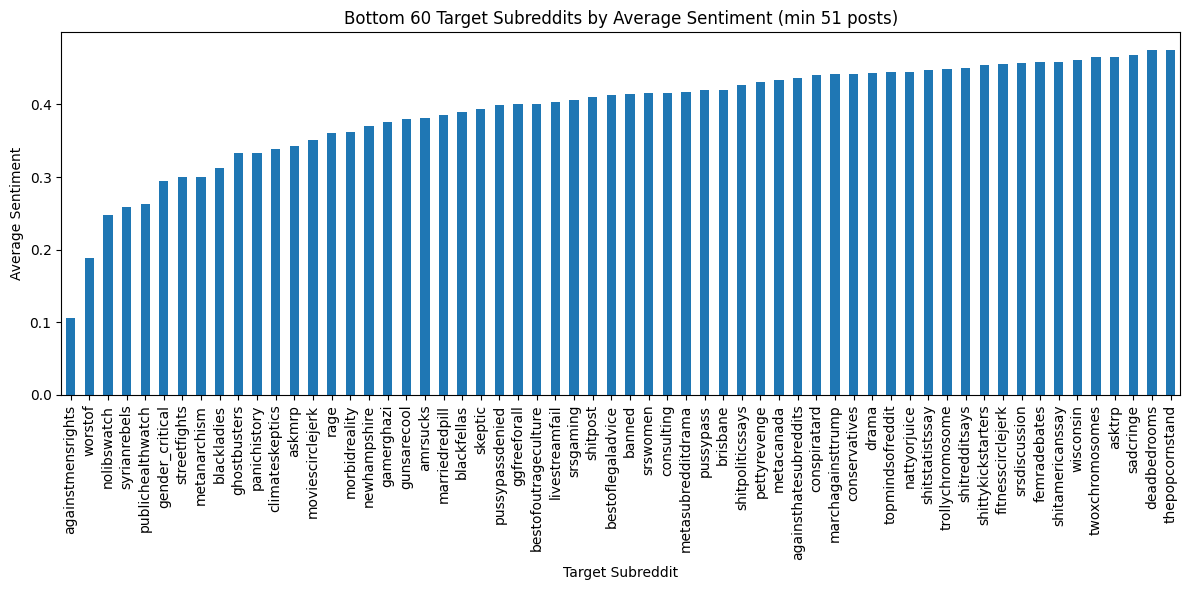

In [24]:
# Rank target subreddits by average sentiment

# Only include subreddits with more than 1000 entries
min_count = 50
counts = data['TARGET_SUBREDDIT'].value_counts()
popular_subs = counts[counts > min_count].index
print(f'Using {len(popular_subs)} subreddits (>{min_count} posts)')

# Compute average sentiment only for popular subreddits
avg_sentiment_by_subreddit = (
    data[data['TARGET_SUBREDDIT'].isin(popular_subs)]
    .groupby('TARGET_SUBREDDIT')['LINK_SENTIMENT']
    .mean()
)

# Convert Series to DataFrame and plot the top N subreddits by average sentiment.
avg_df = avg_sentiment_by_subreddit.reset_index().rename(columns={'LINK_SENTIMENT': 'avg_sentiment'})

top_n = 60
top_avg = avg_df.sort_values('avg_sentiment', ascending=False).head(top_n).set_index('TARGET_SUBREDDIT')

top_avg['avg_sentiment'].plot(kind='bar', figsize=(12,6))
plt.title(f'Top {top_n} Target Subreddits by Average Sentiment (min {min_count+1} posts)')
plt.xlabel('Target Subreddit')
plt.ylabel('Average Sentiment')
plt.tight_layout()
plt.show()

# Show bottom N subreddits by average sentiment
bottom_n = 60
bottom_avg = avg_df.sort_values('avg_sentiment', ascending=True).head(bottom_n).set_index('TARGET_SUBREDDIT')
bottom_avg['avg_sentiment'].plot(kind='bar', figsize=(12,6))
plt.title(f'Bottom {bottom_n} Target Subreddits by Average Sentiment (min {min_count+1} posts)')
plt.xlabel('Target Subreddit')
plt.ylabel('Average Sentiment')
plt.tight_layout()
plt.show()

Using 3744 subreddits (>30 posts)
avg_df columns: ['SOURCE_SUBREDDIT', 'avg_sentiment']
size_df columns: ['SOURCE_SUBREDDIT', 'post_count']
merged rows: 3744
avg_df columns: ['SOURCE_SUBREDDIT', 'avg_sentiment']
size_df columns: ['SOURCE_SUBREDDIT', 'post_count']
merged rows: 3744


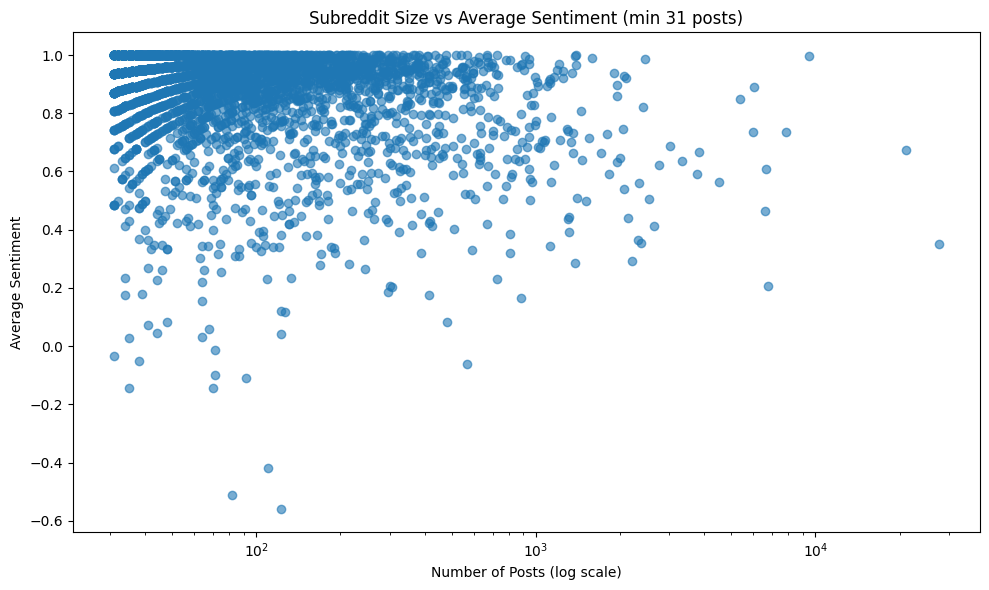

In [17]:
# Rank subreddits by average sentiment and size

# Only include subreddits with more than 30 entries
min_count = 30
counts = data['SOURCE_SUBREDDIT'].value_counts()
popular_subs = counts[counts > min_count].index
print(f'Using {len(popular_subs)} subreddits (>{min_count} posts)')

# Compute average sentiment only for popular subreddits
df_sub = data[data['SOURCE_SUBREDDIT'].isin(popular_subs)].copy()
avg_sentiment_by_subreddit = df_sub.groupby('SOURCE_SUBREDDIT')['LINK_SENTIMENT'].mean()

# Convert to dataframe and plot scatter plot of avg sentiment vs subreddit size
avg_df = avg_sentiment_by_subreddit.reset_index()
avg_df.columns = ['SOURCE_SUBREDDIT', 'avg_sentiment']

# Build size dataframe reliably (explicit column names)
size_df = counts.reset_index()
size_df.columns = ['SOURCE_SUBREDDIT', 'post_count']

# Merge and check columns
merged_df = avg_df.merge(size_df, on='SOURCE_SUBREDDIT')
print('avg_df columns:', avg_df.columns.tolist())
print('size_df columns:', size_df.columns.tolist())
print('merged rows:', len(merged_df))

plt.figure(figsize=(10,6))
plt.scatter(merged_df['post_count'], merged_df['avg_sentiment'], alpha=0.6)
plt.xscale('log')
plt.xlabel('Number of Posts (log scale)')
plt.ylabel('Average Sentiment')
plt.title(f'Subreddit Size vs Average Sentiment (min {min_count+1} posts)')
plt.tight_layout()
plt.show()
